<a href="https://colab.research.google.com/github/tsangrebecca/BloomTech/blob/main/Sprint7/Module1/LS_DS_231_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BloomTech Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

**But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment.** Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

## Assignment

Complete these tasks for your assignment/project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. Review requirements for your portfolio project on Canvas, and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [18]:
!pip install category_encoders==2.*

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [19]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import linear_model
from category_encoders import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler # new imports for ROCAUC curve
from sklearn.metrics import classification_report, roc_curve, ConfusionMatrixDisplay, \
    RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [20]:
plot_confusion_matrix = ConfusionMatrixDisplay.from_estimator
plot_roc_curve = RocCurveDisplay.from_estimator

In [5]:
df = pd.read_csv('NYC_Citywide_Rolling_Calendar_Sales_20231121.csv')

In [8]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,2905,26,NaN,A9,1667 WASHINGTON AVENUE,NaN,...,1.0,0.0,1.0,"4,750",3167.0,1899.0,1,A9,980000,09/08/2022
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3028,24,NaN,A1,410 EAST 179TH STREET,NaN,...,1.0,0.0,1.0,"1,842",2048.0,1901.0,1,A1,655000,11/01/2022
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,65,NaN,A1,4455 PARK AVENUE,NaN,...,1.0,0.0,1.0,"1,622",1587.0,1899.0,1,A1,520000,10/26/2022
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3039,29,NaN,A5,2327 WASHINGTON AVE,NaN,...,1.0,0.0,1.0,"1,095",1260.0,1910.0,1,A5,499999,04/28/2022
4,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3039,63,NaN,A1,469 EAST 185 STREET,NaN,...,1.0,0.0,1.0,"1,650",1296.0,1910.0,1,A1,599000,05/17/2022


In [7]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

 - Choose your target. Which column in your tabular dataset will you predict?
  - predict 'SALE PRICE'
 - Is your problem regression or classification?
  - it's a regression problem

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84391 entries, 0 to 84390
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         84391 non-null  int64  
 1   NEIGHBORHOOD                    84391 non-null  object 
 2   BUILDING CLASS CATEGORY         84391 non-null  object 
 3   TAX CLASS AT PRESENT            84310 non-null  object 
 4   BLOCK                           84391 non-null  int64  
 5   LOT                             84391 non-null  int64  
 6   EASE-MENT                       0 non-null      float64
 7   BUILDING CLASS AT PRESENT       84310 non-null  object 
 8   ADDRESS                         84391 non-null  object 
 9   APARTMENT NUMBER                21338 non-null  object 
 10  ZIP CODE                        84384 non-null  float64
 11  RESIDENTIAL UNITS               63144 non-null  float64
 12  COMMERCIAL UNITS                

In [10]:
df['BUILDING CLASS CATEGORY'].unique()

array(['01 ONE FAMILY DWELLINGS', '02 TWO FAMILY DWELLINGS',
       '03 THREE FAMILY DWELLINGS', '05 TAX CLASS 1 VACANT LAND',
       '07 RENTALS - WALKUP APARTMENTS', '10 COOPS - ELEVATOR APARTMENTS',
       '21 OFFICE BUILDINGS', '22 STORE BUILDINGS',
       '29 COMMERCIAL GARAGES', '30 WAREHOUSES',
       '31 COMMERCIAL VACANT LAND', '32 HOSPITAL AND HEALTH FACILITIES',
       '33 EDUCATIONAL FACILITIES', '38 ASYLUMS AND HOMES',
       '41 TAX CLASS 4 - OTHER', '04 TAX CLASS 1 CONDOS',
       '06 TAX CLASS 1 - OTHER', '08 RENTALS - ELEVATOR APARTMENTS',
       '26 OTHER HOTELS', '27 FACTORIES', '44 CONDO PARKING',
       '09 COOPS - WALKUP APARTMENTS', '12 CONDOS - WALKUP APARTMENTS',
       '14 RENTALS - 4-10 UNIT', '37 RELIGIOUS FACILITIES',
       '43 CONDO OFFICE BUILDINGS', '13 CONDOS - ELEVATOR APARTMENTS',
       '36 OUTDOOR RECREATIONAL FACILITIES',
       '15 CONDOS - 2-10 UNIT RESIDENTIAL', '17 CONDO COOPS',
       '28 COMMERCIAL CONDOS', '35 INDOOR PUBLIC AND CULTURAL FAC

In [14]:
def wrangle(filepath):
    # Import csv file
    # cols = ['BOROUGH', 'NEIGHBORHOOD',
    #         'BUILDING CLASS CATEGORY', 'GROSS SQUARE FEET',
    #         'YEAR BUILT', 'SALE PRICE', 'SALE DATE']
    df = pd.read_csv(filepath,
                    #  usecols=cols,
                     parse_dates=['SALE DATE'],  # has to work with lists so we need []
                     index_col='SALE DATE',
                     dtype={'BOROUGH':'object'}) # convert int to object

    # Clean col headers
    df.columns = df.columns.str.lower().str.replace(' ', '_')

    # convert sale price to integers
    # df['sale_price'] = (df['sale_price']
    #                     .str.replace('$', '') # deleting $
    #                     .str.replace('-', '') # deleting -
    #                     .str.replace(',', '') # deleting ,
    #                     .astype(int))

    # subset df to one-family dwellings, 100K to 2mil
    # df = df[(df['building_class_category'] == '01 ONE FAMILY DWELLINGS') & (df['sale_price'] > 100000) & (df['sale_price'] < 2000000)] # you can't sandwich the variable between 2 numbers, have to write out both conditions separately connected by and &

    # drop the column that has the same values
    df.drop(columns='building_class_category')

    return df

filepath = 'NYC_Citywide_Rolling_Calendar_Sales_20231121.csv'

In [15]:
df = wrangle(filepath)
df.head()

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price
SALE DATE,,,,,,,,,,,,,,,,,,,,
2022-09-08,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,2905,26,NaN,A9,1667 WASHINGTON AVENUE,NaN,10457.0,1.0,0.0,1.0,"4,750",3167.0,1899.0,1,A9,980000
2022-11-01,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3028,24,NaN,A1,410 EAST 179TH STREET,NaN,10457.0,1.0,0.0,1.0,"1,842",2048.0,1901.0,1,A1,655000
2022-10-26,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,65,NaN,A1,4455 PARK AVENUE,NaN,10457.0,1.0,0.0,1.0,"1,622",1587.0,1899.0,1,A1,520000
2022-04-28,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3039,29,NaN,A5,2327 WASHINGTON AVE,NaN,10458.0,1.0,0.0,1.0,"1,095",1260.0,1910.0,1,A5,499999
2022-05-17,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3039,63,NaN,A1,469 EAST 185 STREET,NaN,10458.0,1.0,0.0,1.0,"1,650",1296.0,1910.0,1,A1,599000


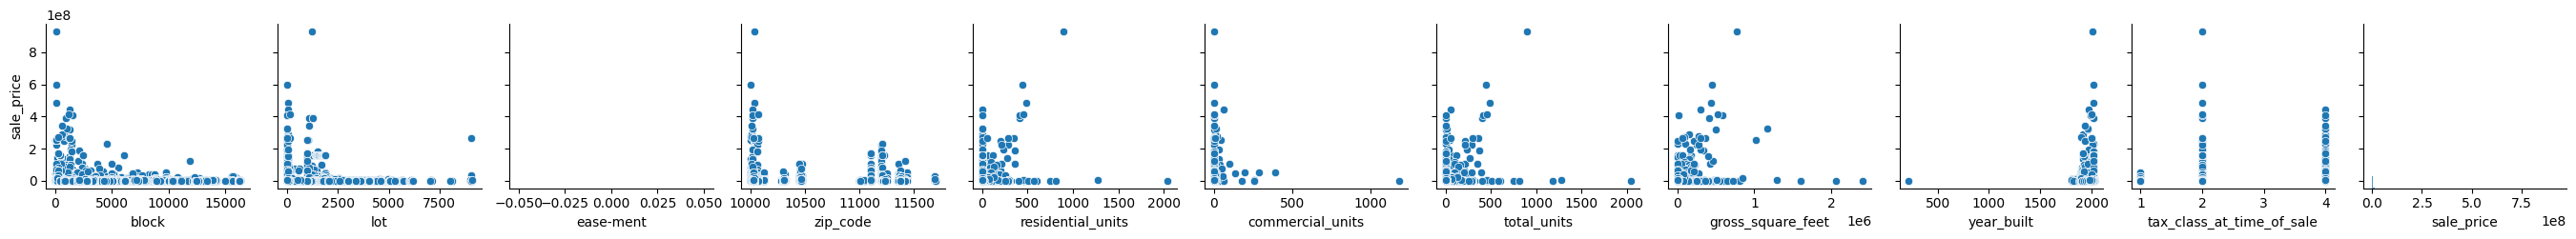

In [25]:
# Create a pair plot
sns.pairplot(df, y_vars=['sale_price'], kind='scatter')

# Show the plot
plt.show()

- How is your target distributed? Regression: Is the target right-skewed? If so, you may want to log transform the target.
  - No
- Choose your evaluation metric(s). Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
  - can use all of the above, MAE, RMSE, and R-square

- Choose which observations you will use to train, validate, and test your model.
Are some observations outliers? Will you exclude them? Will you do a random split or a time-based split?
  - Use a time-based split to split the data into training (80%), validate (10%) and test (10%)
  - exclude the outliers with really high prices

- Begin to clean and explore your data. Begin to choose which features, if any, to exclude. Would some features "leak" future information?
 - exclude high cardinality columns, constant columns, tax class at present might contain info about the price so exclude that as well.